In [1]:
%matplotlib nbagg

In [2]:
import numpy
import matplotlib.pyplot as plt

import sys

import getpass

username = getpass.getuser()

sys.path.append('/Users/{}/Documents/Reference/G/github/sidpy/sidpy'.format(username))

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

import matplotlib
import matplotlib.cm as cmx
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

In [3]:
p_max = 10
is_multirealization = False

In [4]:
#x = numpy.loadtxt('../example-data/data-shenon/x.dat', delimiter = ',')[:, 0]
#y = numpy.loadtxt('../example-data/data-shenon/y.dat', delimiter = ',')[:, 0]

x = numpy.loadtxt('../example-data/data-shenon/y.dat', delimiter = ',')[:1000, 0]
y = numpy.loadtxt('../example-data/data-shenon/x.dat', delimiter = ',')[:1000, 0]

# x = x.reshape(1, -1)
# y = y.reshape(1, -1)

<IPython.core.display.Javascript object>


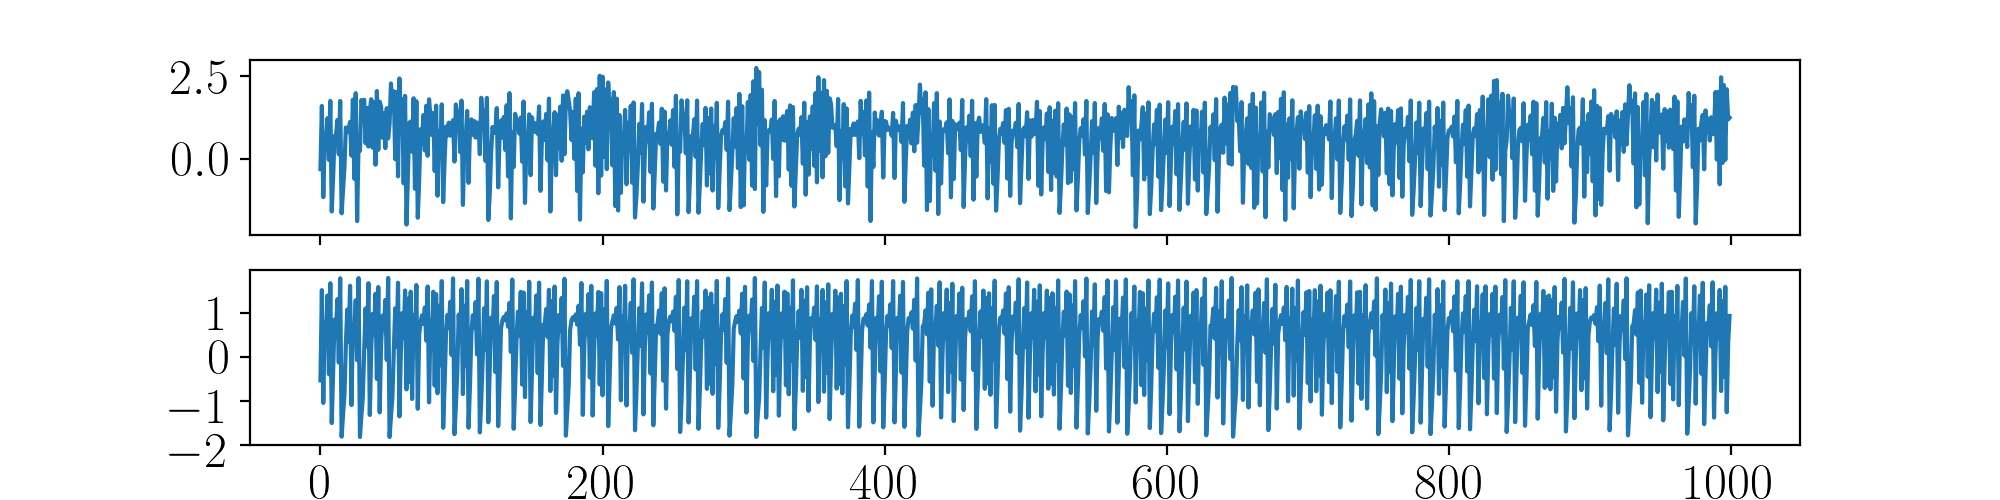

In [5]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 2.5))

ax[0].plot(x[:1000])
ax[1].plot(y[:1000])

In [6]:
p_max = 10

p_opt, mse_opt, mse_by_p, kstar_by_p = choose_model_order_mse(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)
#p_opt, nlpl_opt, nlpl_by_p = choose_model_order_nlpl(x, p_max, pow_upperbound = 0.5, nn_package = 'sklearn', is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)

print '\nChose p* = {}...'.format(p_opt)

For p = 1, chose k* = 24 with MSE(k*) = 0.47738443229
####################################################
# Warning: For p = 1, Nelder-Mead is choosing k* near k_upper = 32.
# Increase pow_upperbound.
####################################################
For p = 2, chose k* = 7 with MSE(k*) = 0.175341278632
For p = 3, chose k* = 3 with MSE(k*) = 0.113686558946
For p = 4, chose k* = 3 with MSE(k*) = 0.100214767219
For p = 5, chose k* = 2 with MSE(k*) = 0.109171134633
For p = 6, chose k* = 3 with MSE(k*) = 0.146372689975
For p = 7, chose k* = 3 with MSE(k*) = 0.209720651275
For p = 8, chose k* = 3 with MSE(k*) = 0.303147042877
For p = 9, chose k* = 3 with MSE(k*) = 0.328509481259
For p = 10, chose k* = 3 with MSE(k*) = 0.397148414306

Chose p* = 4...


In [7]:
q = 1
delay = 0

lTEs, TE = estimate_lte(y, x, q, p_opt, delay, k = 5)

print 'The estimated Total Transfer Entropy is {}'.format(TE)

The estimated Total Transfer Entropy is 0.35161419046


In [8]:
sTEs = estimate_ste(y, x, q, p_opt, delay, lTEs, pow_neighbors = 0.5, verbose = False)

<IPython.core.display.Javascript object>


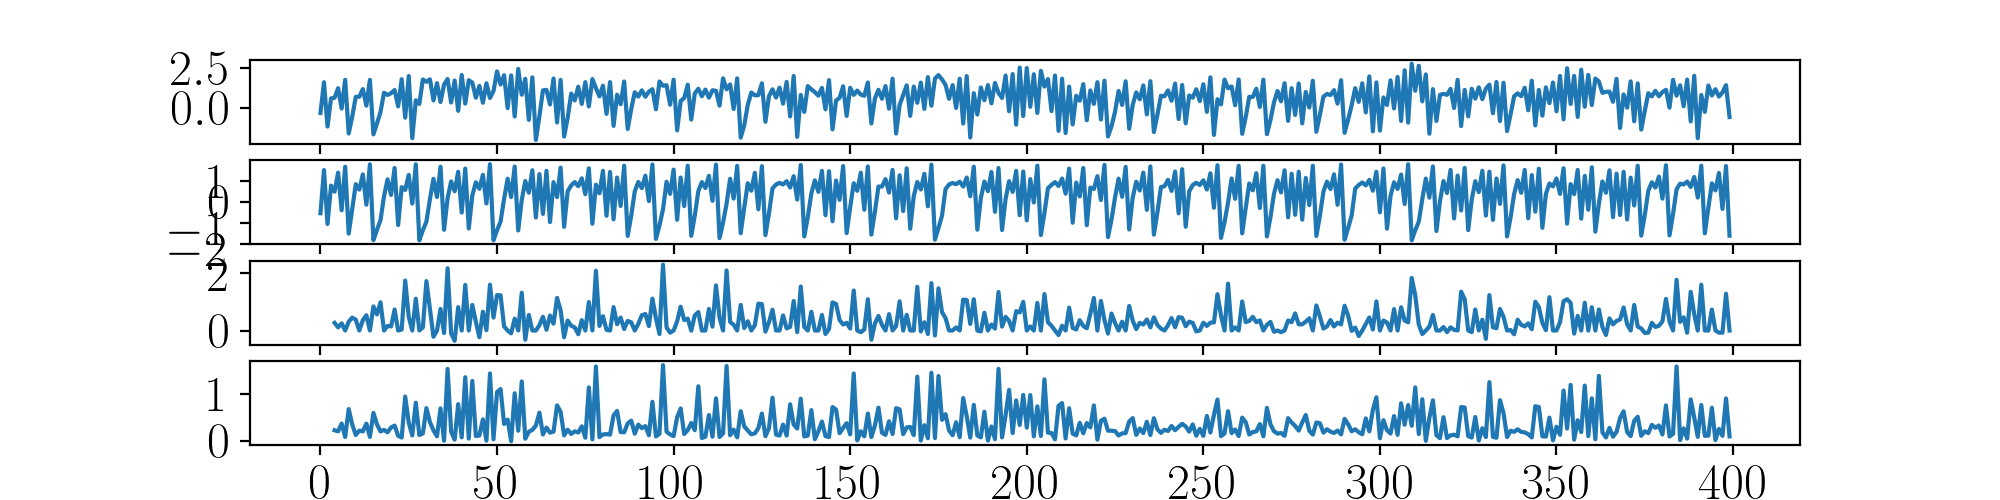

In [9]:
fig, ax = plt.subplots(4, 1, sharex = True, figsize = (10, 2.5))

plot_to = 400

ax[0].plot(x[:plot_to])
ax[1].plot(y[:plot_to])
ax[2].plot(lTEs[:plot_to])
ax[3].plot(sTEs[:plot_to])
